<a href="https://colab.research.google.com/github/anurvish/Scalable_Data/blob/main/modelLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import normalize,StandardScaler,MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt


In [4]:
#reading the data from CSV file
df = pd.read_csv("final_data.csv", )

#Obtained preprocessed data
df = df.replace(np.NaN, 0)

#dropping columns considered as not available during movie conception stage and irrelevant columns
df.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
df.drop(labels=['release_date_main'],axis=1,inplace=True)
df.drop(labels=['id_main'],axis=1,inplace=True)
df.drop(labels=['runtime_main'],axis=1,inplace=True)

#Splitting the data into Independent features and target variable 
Independent_features = df.iloc[:,1:]
Target = df.iloc[:,0]
Independent_features = Independent_features.replace(np.nan,0)

In [5]:
# calculate Variance inflation factor for the given data frame
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fitb
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})


In [6]:
df_vif = calculate_vif(Independent_features,['budget_main','Action_genre_main',
       'Adventure_genre_main', 'Animation_genre_main', 'Comedy_genre_main',
       'Crime_genre_main', 'Documentary_genre_main', 'Drama_genre_main',
       'Family_genre_main', 'Fantasy_genre_main', 'History_genre_main',
       'Horror_genre_main', 'Music_genre_main', 'Mystery_genre_main',
       'Romance_genre_main', 'Science Fiction_genre_main',
       'TV Movie_genre_main', 'Thriller_genre_main', 'War_genre_main',
       'Western_genre_main', 'collection_popularity_coll_details','popularity_crew', '0_gender_crew', '1_gender_crew',
       '2_gender_crew','Directing_relevance_crew', 'popularity_crew_2',
       '0_gender_crew_2', '1_gender_crew_2', '2_gender_crew_2','Directing_relevance_crew_2', 'popularity_crew_3',
       '0_gender_crew_3', '1_gender_crew_3', '2_gender_crew_3','Directing_relevance_crew_3', 'popularity_cast',
       '2_gender_cast', '1_gender_cast', '0_gender_cast', '3_gender_cast',
       'Acting_relevance_cast', 'popularity_cast_2', '2_gender_cast_2',
       
       '1_gender_cast_2', '0_gender_cast_2', '3_gender_cast_2',
       'Acting_relevance_cast_2', 'popularity_cast_3', '2_gender_cast_3',
       '1_gender_cast_3', '0_gender_cast_3', '3_gender_cast_3',
       'Acting_relevance_cast_3', 'popularity_cast_4', '2_gender_cast_4',
       '1_gender_cast_4', '0_gender_cast_4', '3_gender_cast_4',
       'Acting_relevance_cast_4', 'popularity_cast_5', '2_gender_cast_5',
       '1_gender_cast_5', '0_gender_cast_5', '3_gender_cast_5',
       'Acting_relevance_cast_5'])

df_vif

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as ap

,VIF,Tolerance
budget_main,1.682974e+00,5.941862e-01
Action_genre_main,1.498576e+00,6.673004e-01
Adventure_genre_main,1.439183e+00,6.948388e-01
Animation_genre_main,1.642823e+00,6.087084e-01
Comedy_genre_main,1.518143e+00,6.586993e-01
...,...,...
2_gender_cast_5,inf,0.000000e+00
1_gender_cast_5,inf,0.000000e+00
0_gender_cast_5,9.007199e+15,1.110223e-16
3_gender_cast_5,inf,0.000000e+00


In [7]:
#Retaining features that have vif value <5
Independent_features = Independent_features[['budget_main','Action_genre_main',
       'Adventure_genre_main', 'Animation_genre_main', 'Comedy_genre_main',
       'Crime_genre_main', 'Documentary_genre_main', 'Drama_genre_main',
       'Family_genre_main', 'Fantasy_genre_main', 'History_genre_main',
       'Horror_genre_main', 'Music_genre_main', 'Mystery_genre_main',
       'Romance_genre_main', 'Science Fiction_genre_main',
       'TV Movie_genre_main', 'Thriller_genre_main', 'War_genre_main',
       'Western_genre_main', 'collection_popularity_coll_details','popularity_crew', 'popularity_crew_2', 'popularity_crew_3', 'popularity_cast', 
       'popularity_cast_2', 'popularity_cast_3', 'popularity_cast_4', 'popularity_cast_5']]

In [8]:
#Scaling budget and revenue columns
mms_budget = MinMaxScaler()
mms_budget.fit(Independent_features['budget_main'].to_numpy().reshape(-1,1))
Independent_features['budget_main'] = mms_budget.fit_transform(Independent_features['budget_main'].to_numpy().reshape(-1,1))

mms_revenue = MinMaxScaler()
mms_revenue.fit(Target.values.reshape(-1,1))
Target = mms_revenue.fit_transform(Target.values.reshape(-1,1))

In [9]:
#splitting the final data into train and test data 
xtrain, xtest, ytrain, ytest = train_test_split(Independent_features, Target, test_size=0.2)

In [31]:
kf = KFold(n_splits=5)
trainR2 = []; validateR2 = []; testR2 = []
trainRMSE = []; validateRMSE = []; testRMSE = []
for train, validate in kf.split(xtrain):
  model = LinearRegression().fit(Independent_features.iloc[train], Target[train])
  validateKfoldPred = model.predict(Independent_features.iloc[validate])
  trainKfoldPred = model.predict(Independent_features.iloc[train])
  
  trainR2.append(r2_score(Target[train],trainKfoldPred))
  validateR2.append(r2_score(Target[validate],validateKfoldPred))
  testR2.append(r2_score(ytest,model.predict(xtest)))

  trainRMSE.append(mean_squared_error(Target[train], trainKfoldPred,squared=False))
  validateRMSE.append(mean_squared_error(Target[validate], validateKfoldPred,squared=False))
  testRMSE.append(mean_squared_error(ytest,model.predict(xtest),squared=False))

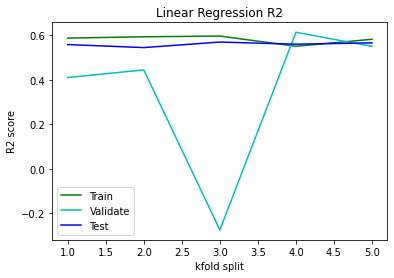

In [33]:
plt.plot(range(1,6),trainR2,color='g',label='Train')
plt.plot(range(1,6),validateR2,color='c',label='Validate')
plt.plot(range(1,6),testR2,color='b',label='Test')
plt.title('Linear Regression R2')
plt.xlabel('kfold split')
plt.ylabel('R2 score')
plt.legend()
plt.show()

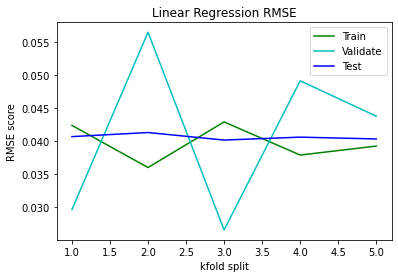

In [34]:
plt.plot(range(1,6),trainRMSE,color='g',label='Train')
plt.plot(range(1,6),validateRMSE,color='c',label='Validate')
plt.plot(range(1,6),testRMSE,color='b',label='Test')
plt.title('Linear Regression RMSE')
plt.legend()
plt.xlabel('kfold split')
plt.ylabel('RMSE score')
plt.show()